In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score,
)

In [2]:
mob_price_data = pd.read_csv("datasets/mobile_price.csv")

mob_price_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
mob_price_data.shape

(2000, 21)

In [4]:
mob_price_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
numeric_features = [
    "battery_power",
    "clock_speed",
    "fc",
    "int_memory",
    "m_dep",
    "mobile_wt",
    "pc",
    "px_height",
    "px_width",
    "ram",
    "sc_h",
    "sc_w",
    "talk_time",
]
categorical_features = [
    "blue",
    "dual_sim",
    "four_g",
    "n_cores",
    "three_g",
    "touch_screen",
    "wifi",
]

In [6]:
len(numeric_features + categorical_features), len(mob_price_data.columns)

(20, 21)

In [7]:
mob_price_data["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [8]:
mob_price_data[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


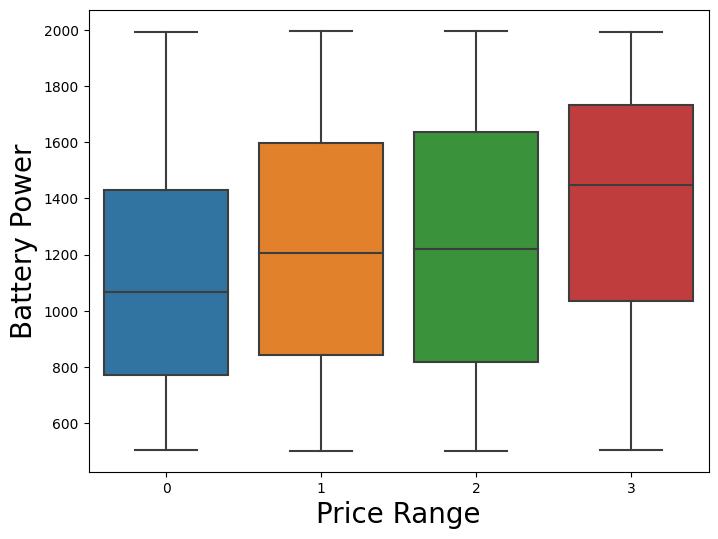

In [9]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=mob_price_data, x="price_range", y="battery_power")

plt.xlabel("Price Range", fontsize=20)
plt.ylabel("Battery Power", fontsize=20)

plt.show()

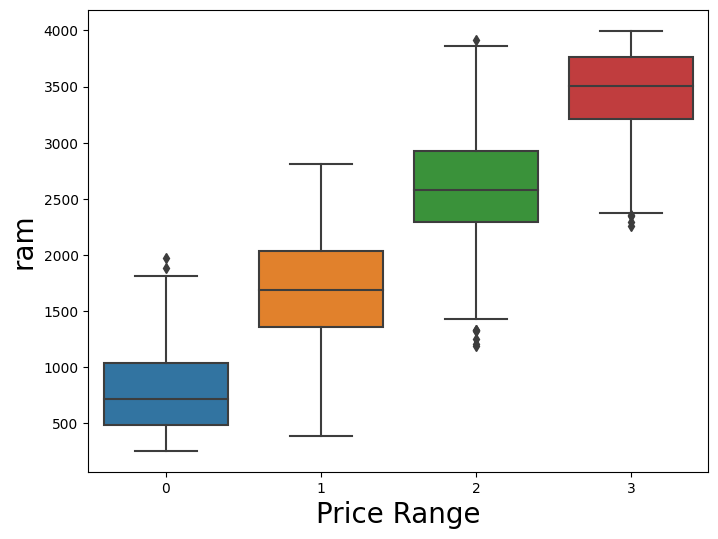

In [10]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=mob_price_data, x="price_range", y="ram")

plt.xlabel("Price Range", fontsize=20)
plt.ylabel("ram", fontsize=20)

plt.show()

In [11]:
features = mob_price_data.drop("price_range", axis=1)
features

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [12]:
numeric_features = mob_price_data[numeric_features].copy()
numeric_features.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15


In [13]:
categorical_features = mob_price_data[categorical_features].copy()
categorical_features.head()

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0,0,0,2,0,0,1
1,1,1,1,3,1,1,0
2,1,1,1,5,1,1,0
3,1,0,0,6,1,0,0
4,1,0,1,2,1,1,0


In [14]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(
    standardScaler.fit_transform(numeric_features),
    columns=numeric_features.columns,
    index=numeric_features.index,
)
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,2.149392e-16,1.00025,-1.678817,-0.880403,-0.028496,0.857556,1.728812
clock_speed,2000.0,-1.545430e-16,1.00025,-1.253064,-1.007906,-0.027274,0.830779,1.811412
fc,2000.0,5.861978e-17,1.00025,-0.992890,-0.762495,-0.301703,0.619880,3.384628
int_memory,2000.0,-9.592327e-17,1.00025,-1.656260,-0.884535,-0.002563,0.879408,1.761380
m_dep,2000.0,-1.030287e-16,1.00025,-1.393304,-1.046495,-0.006069,1.034357,1.727974
mobile_wt,2000.0,1.278977e-16,1.00025,-1.702391,-0.882969,0.021220,0.840642,1.688320
pc,2000.0,1.403322e-16,1.00025,-1.635631,-0.810929,0.013773,0.838474,1.663176
px_height,2000.0,1.181277e-16,1.00025,-1.454027,-0.816729,-0.182812,0.681006,2.963672
px_width,2000.0,6.084022e-17,1.00025,-1.739251,-0.871958,-0.010450,0.882879,1.727608
ram,2000.0,-1.811884e-16,1.00025,-1.722711,-0.845317,0.020551,0.867055,1.727851


In [15]:
processed_features = pd.concat(
    [numeric_features, categorical_features], axis=1, ignore_index=True, sort=False
)
processed_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,0,2,0,0,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,1,3,1,1,0
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,1,5,1,1,0
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,6,1,0,0
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,0,1,2,1,1,0


In [16]:
target = mob_price_data[["price_range"]]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    processed_features, target, test_size=0.2, random_state=10
)
x_train_tensor = torch.from_numpy(x_train.values).float()
x_test_tensor = torch.from_numpy(x_test.values).float()
y_train_tensor = torch.from_numpy(y_train.values).view(1, -1)[0].long()
y_test_tensor = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [18]:
x_train_tensor.shape, x_test_tensor.shape

(torch.Size([1600, 20]), torch.Size([400, 20]))

In [19]:
y_train_tensor.shape, y_test_tensor.shape

(torch.Size([1600]), torch.Size([400]))

In [20]:
y_train_tensor[:5]

tensor([0, 3, 0, 3, 2])

In [21]:
input_size = x_train_tensor.shape[1]
output_size = len(target["price_range"].unique())

In [22]:
input_size, output_size

(20, 4)

In [23]:
class Net(nn.Module):
    def __init__(self, hidden_size, activiation_fn="relu", apply_dropout=False):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activiation_fn

        self.dropout_1 = None
        self.dropout_2 = None
        if apply_dropout:
            self.dropout_1 = nn.Dropout(0.2)
            self.dropout_2 = nn.Dropout(0.3)

    def forward(self, x):
        activation_fn = None
        if self.activation_fn == "sigmoid":
            activation_fn = F.torch.sigmoid
        elif self.activation_fn == "tanh":
            activation_fn = F.torch.tanh
        elif self.activation_fn == "relu":
            activation_fn = F.relu

        x = activation_fn(self.fc1(x))
        if self.dropout_1 != None:
            x = self.dropout_1(x)

        x - activation_fn(self.fc2(x))
        if self.dropout_2 != None:
            x = self.dropout_2(x)

        x = self.fc3(x)

        return F.log_softmax(x, dim=-1)

In [24]:
def train_and_evaluate_model(model, epochs=1000, learn_rate=1e-3):
    epoch_data = []
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    loss_fn = nn.NLLLoss()
    test_accuracy = 0.0

    for epoch in range(1, epochs + 1):
        model.train()

        optimizer.zero_grad()

        y_pred_train = model(x_train_tensor)

        loss_train = loss_fn(y_pred_train, y_train_tensor)

        loss_train.backward()

        optimizer.step()

        model.eval()

        y_pred_test = model(x_test_tensor)
        loss_test = loss_fn(y_pred_test, y_test_tensor)

        _, pred = y_pred_test.data.max(1)

        test_accuracy = pred.eq(y_test_tensor.data).sum().item() / y_test.values.size

        epoch_data.append(
            [epoch, loss_train.data.item(), loss_test.data.item(), test_accuracy]
        )

        if epoch % 100 == 0:
            print(
                "epoch -  %d train loss - %.2f test loss - %.2f Test accuracy - %.4f"
                % (epoch, loss_train.data.item(), loss_test.data.item(), test_accuracy)
            )

    return {
        "model": model,
        "epoch_data": epoch_data,
        "_, pred": y_pred_test.data.max(1),
        "actual_test_label": y_test_tensor,
    }

In [25]:
net = Net(hidden_size=5, activiation_fn="sigmoid", apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=20, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=4, bias=True)
)

In [26]:
result_5_sigmoid = train_and_evaluate_model(net)

epoch -  100 train loss - 1.37 test loss - 1.37 Test accuracy - 0.3575
epoch -  200 train loss - 1.32 test loss - 1.33 Test accuracy - 0.4125
epoch -  300 train loss - 1.24 test loss - 1.26 Test accuracy - 0.4600
epoch -  400 train loss - 1.15 test loss - 1.18 Test accuracy - 0.5175
epoch -  500 train loss - 1.06 test loss - 1.09 Test accuracy - 0.5675
epoch -  600 train loss - 0.98 test loss - 1.00 Test accuracy - 0.6475
epoch -  700 train loss - 0.91 test loss - 0.93 Test accuracy - 0.7250
epoch -  800 train loss - 0.84 test loss - 0.87 Test accuracy - 0.7775
epoch -  900 train loss - 0.79 test loss - 0.81 Test accuracy - 0.8075
epoch -  1000 train loss - 0.74 test loss - 0.76 Test accuracy - 0.8400


In [27]:
result_5_sigmoid = train_and_evaluate_model(net, epochs=2000)

epoch -  100 train loss - 0.69 test loss - 0.71 Test accuracy - 0.8600
epoch -  200 train loss - 0.64 test loss - 0.66 Test accuracy - 0.8700
epoch -  300 train loss - 0.60 test loss - 0.62 Test accuracy - 0.8850
epoch -  400 train loss - 0.56 test loss - 0.58 Test accuracy - 0.8950
epoch -  500 train loss - 0.53 test loss - 0.55 Test accuracy - 0.9050
epoch -  600 train loss - 0.49 test loss - 0.51 Test accuracy - 0.9075
epoch -  700 train loss - 0.47 test loss - 0.48 Test accuracy - 0.9125
epoch -  800 train loss - 0.44 test loss - 0.46 Test accuracy - 0.9200
epoch -  900 train loss - 0.41 test loss - 0.43 Test accuracy - 0.9325
epoch -  1000 train loss - 0.39 test loss - 0.41 Test accuracy - 0.9350
epoch -  1100 train loss - 0.37 test loss - 0.39 Test accuracy - 0.9375
epoch -  1200 train loss - 0.35 test loss - 0.37 Test accuracy - 0.9425
epoch -  1300 train loss - 0.33 test loss - 0.35 Test accuracy - 0.9450
epoch -  1400 train loss - 0.31 test loss - 0.33 Test accuracy - 0.9475
e

In [28]:
net = Net(hidden_size=5, activiation_fn="sigmoid", apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=20, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=4, bias=True)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (dropout_2): Dropout(p=0.3, inplace=False)
)

In [29]:
result_5_sigmoid = train_and_evaluate_model(net, epochs=3000)

epoch -  100 train loss - 1.40 test loss - 1.39 Test accuracy - 0.2600
epoch -  200 train loss - 1.37 test loss - 1.36 Test accuracy - 0.3950
epoch -  300 train loss - 1.31 test loss - 1.31 Test accuracy - 0.4450
epoch -  400 train loss - 1.27 test loss - 1.25 Test accuracy - 0.5025
epoch -  500 train loss - 1.21 test loss - 1.18 Test accuracy - 0.5650
epoch -  600 train loss - 1.15 test loss - 1.11 Test accuracy - 0.6450
epoch -  700 train loss - 1.11 test loss - 1.04 Test accuracy - 0.7150
epoch -  800 train loss - 1.05 test loss - 0.98 Test accuracy - 0.8225
epoch -  900 train loss - 1.01 test loss - 0.92 Test accuracy - 0.8475
epoch -  1000 train loss - 0.97 test loss - 0.88 Test accuracy - 0.8525
epoch -  1100 train loss - 0.95 test loss - 0.84 Test accuracy - 0.8625
epoch -  1200 train loss - 0.93 test loss - 0.81 Test accuracy - 0.8775
epoch -  1300 train loss - 0.89 test loss - 0.78 Test accuracy - 0.8725
epoch -  1400 train loss - 0.86 test loss - 0.75 Test accuracy - 0.8800
e

In [30]:
net = Net(hidden_size=10, activiation_fn="tanh")
net

Net(
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=4, bias=True)
)

In [31]:
result_10_tanh = train_and_evaluate_model(net)

epoch -  100 train loss - 1.18 test loss - 1.21 Test accuracy - 0.5000
epoch -  200 train loss - 0.96 test loss - 1.00 Test accuracy - 0.6375
epoch -  300 train loss - 0.77 test loss - 0.81 Test accuracy - 0.7550
epoch -  400 train loss - 0.63 test loss - 0.66 Test accuracy - 0.8450
epoch -  500 train loss - 0.53 test loss - 0.56 Test accuracy - 0.8750
epoch -  600 train loss - 0.46 test loss - 0.49 Test accuracy - 0.9025
epoch -  700 train loss - 0.40 test loss - 0.42 Test accuracy - 0.9200
epoch -  800 train loss - 0.35 test loss - 0.37 Test accuracy - 0.9350
epoch -  900 train loss - 0.31 test loss - 0.33 Test accuracy - 0.9400
epoch -  1000 train loss - 0.27 test loss - 0.30 Test accuracy - 0.9425


In [32]:
net = Net(hidden_size=10, activiation_fn="tanh", apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=4, bias=True)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (dropout_2): Dropout(p=0.3, inplace=False)
)

In [33]:
result_10_tanh = train_and_evaluate_model(net)

epoch -  100 train loss - 1.30 test loss - 1.30 Test accuracy - 0.4175
epoch -  200 train loss - 1.06 test loss - 1.08 Test accuracy - 0.6075
epoch -  300 train loss - 0.86 test loss - 0.85 Test accuracy - 0.7500
epoch -  400 train loss - 0.72 test loss - 0.70 Test accuracy - 0.8475
epoch -  500 train loss - 0.62 test loss - 0.60 Test accuracy - 0.8700
epoch -  600 train loss - 0.56 test loss - 0.52 Test accuracy - 0.8975
epoch -  700 train loss - 0.50 test loss - 0.46 Test accuracy - 0.9050
epoch -  800 train loss - 0.44 test loss - 0.41 Test accuracy - 0.9150
epoch -  900 train loss - 0.42 test loss - 0.37 Test accuracy - 0.9250
epoch -  1000 train loss - 0.38 test loss - 0.33 Test accuracy - 0.9325


In [34]:
net = Net(hidden_size=50, activiation_fn="relu")
net

Net(
  (fc1): Linear(in_features=20, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=4, bias=True)
)

In [35]:
result_50_relu = train_and_evaluate_model(net)

epoch -  100 train loss - 0.88 test loss - 0.94 Test accuracy - 0.6525
epoch -  200 train loss - 0.53 test loss - 0.57 Test accuracy - 0.8600
epoch -  300 train loss - 0.37 test loss - 0.42 Test accuracy - 0.8900
epoch -  400 train loss - 0.27 test loss - 0.33 Test accuracy - 0.9075
epoch -  500 train loss - 0.21 test loss - 0.28 Test accuracy - 0.9175
epoch -  600 train loss - 0.16 test loss - 0.24 Test accuracy - 0.9200
epoch -  700 train loss - 0.13 test loss - 0.23 Test accuracy - 0.9175
epoch -  800 train loss - 0.11 test loss - 0.22 Test accuracy - 0.9075
epoch -  900 train loss - 0.09 test loss - 0.21 Test accuracy - 0.9075
epoch -  1000 train loss - 0.08 test loss - 0.21 Test accuracy - 0.9075


In [36]:
net = Net(hidden_size=50, activiation_fn="relu", apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=20, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=4, bias=True)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (dropout_2): Dropout(p=0.3, inplace=False)
)

In [37]:
result_50_relu = train_and_evaluate_model(net)

epoch -  100 train loss - 0.97 test loss - 0.96 Test accuracy - 0.6450
epoch -  200 train loss - 0.65 test loss - 0.62 Test accuracy - 0.8500
epoch -  300 train loss - 0.47 test loss - 0.45 Test accuracy - 0.8900
epoch -  400 train loss - 0.37 test loss - 0.35 Test accuracy - 0.9100
epoch -  500 train loss - 0.30 test loss - 0.29 Test accuracy - 0.9225
epoch -  600 train loss - 0.25 test loss - 0.24 Test accuracy - 0.9400
epoch -  700 train loss - 0.22 test loss - 0.21 Test accuracy - 0.9425
epoch -  800 train loss - 0.21 test loss - 0.19 Test accuracy - 0.9600
epoch -  900 train loss - 0.18 test loss - 0.17 Test accuracy - 0.9650
epoch -  1000 train loss - 0.17 test loss - 0.16 Test accuracy - 0.9675


In [38]:
epochs_data = pd.DataFrame(
    result_50_relu["epoch_data"],
    columns=["epoch", "train_loss", "test_loss", "accuracy"],
)

In [39]:
epochs_data.head()

,epoch,train_loss,test_loss,accuracy
0,1,1.452546,1.430552,0.2425
1,2,1.431350,1.421448,0.2450
2,3,1.421983,1.412917,0.2525
3,4,1.411184,1.405044,0.2550
4,5,1.421962,1.397677,0.2625


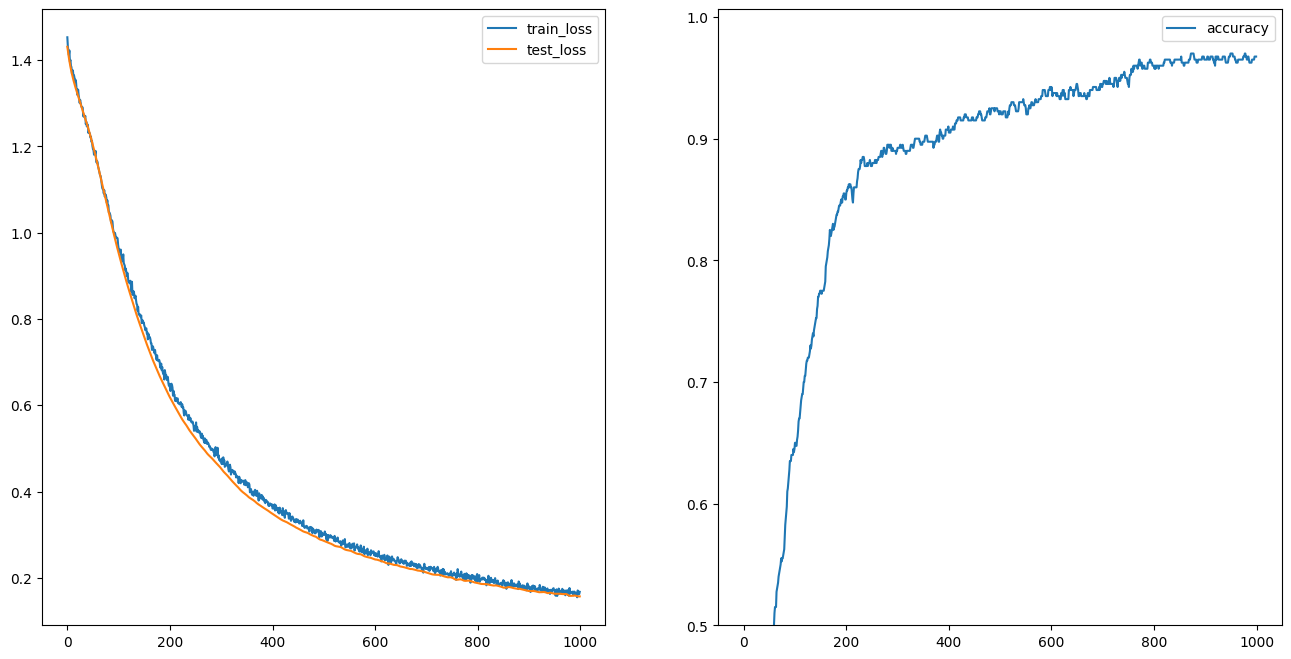

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom=0.5)
plt.show()

In [41]:
_, pred = result_50_relu["_, pred"]

In [42]:
y_pred = pred.detach().numpy()

In [43]:
y_test = result_50_relu["actual_test_label"].detach().numpy()

In [44]:
pred_results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [45]:
pred_results.head(10)

,y_test,y_pred
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
5,3,3
6,3,3
7,3,3
8,1,1
9,3,3


In [46]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 92,   0,   0,   0],
       [  3,  94,   0,   0],
       [  0,   4, 102,   3],
       [  0,   0,   3,  99]], dtype=int64)

In [47]:
recall_score(y_test, y_pred, average="weighted")

0.9675

In [48]:
precision_score(y_test, y_pred, average="weighted")

0.9675531686358754